In [1]:
import numpy as np

In [145]:
n_nodes = 2
nodes = list(range(n_nodes))
M = np.random.rand(n_nodes, n_nodes)

In [154]:
def make_graph(nodes: list, M: np.ndarray, G: nx.MultiDiGraph()=nx.MultiDiGraph()):
    edge_labels = {}
    G.add_nodes_from(range(M.shape[0]))
    for i, origin_node in enumerate(nodes):
        for j, destination_node in enumerate(nodes):
            if M[i, j] != 0:
                G.add_edge(origin_node, destination_node, weight=M[i, j], label=f"{M[i, j]:0.02f}")

            edge_labels[(origin_node, destination_node)] = f"{M[i, j]:0.02f}"
    return G, edge_labels

In [156]:
G, edge_labels = make_graph(nodes, M)
print(G)
print()

MultiDiGraph with 2 nodes and 4 edges



In [157]:
nx.get_edge_attributes(G, 'label')

{(0, 0, 0): '0.45', (0, 1, 0): '0.29', (1, 0, 0): '0.89', (1, 1, 0): '0.58'}

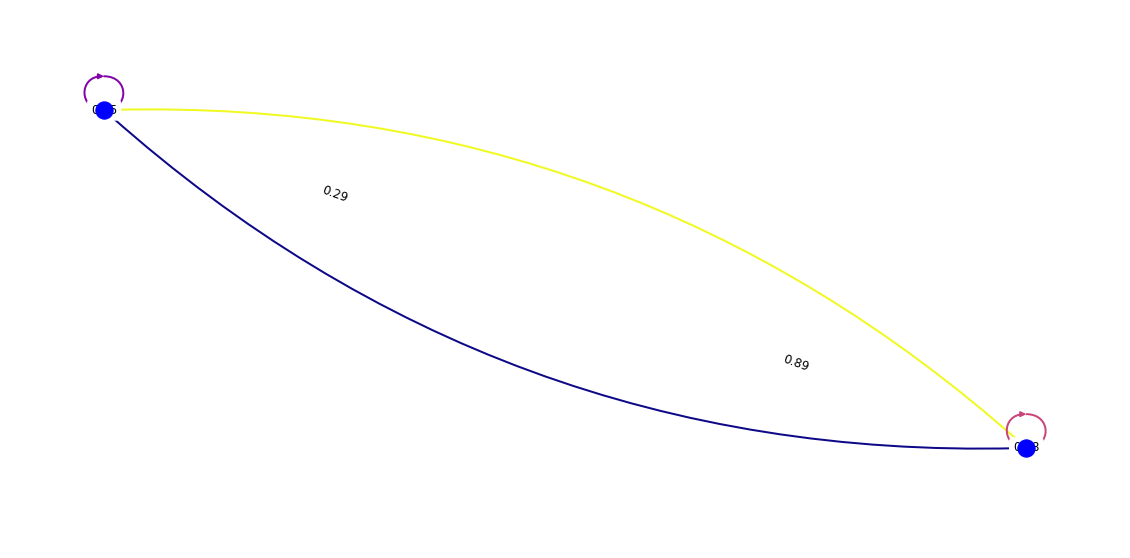

In [151]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots(figsize=(20, 10))
seed = 13648  # Seed random number generators for reproducibility
pos = nx.spring_layout(G, seed=seed)

edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.plasma, connectionstyle='arc3, rad=0.2', ax=ax)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='k', label_pos=0.75, ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=G.edges)

plt.show()

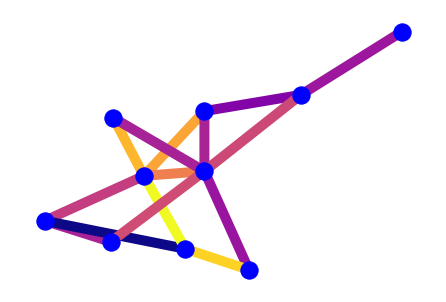

In [123]:
# Src: https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx

import matplotlib.pyplot as plt
import networkx as nx
import random

G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.plasma)


plt.show()

/tmp/ipykernel_87489/380245897.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


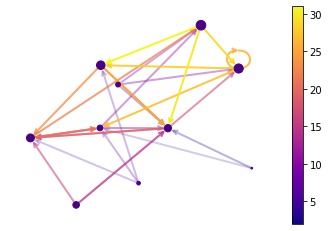

In [97]:
# src: https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()